## Read tips data set :


In [7]:
with open("../Datasets/tips.csv") as fp:
  header = fp.readline().strip().split()
  print(header)
  days={}
  count=0
  for line in fp:
    data=line.strip().split(",")
    data[0]=float(data[0])
    data[1]=float(data[1])
    data[-1]=float(data[-1])
    #print(data)
    count+=1
    if data[4] in days:
        days[data[4]]+=data[0]
    else:
        days[data[4]]=data[0]
    #print(data)
  print(count)
for day in days:
    print(day,days[day]/count)




['"total_bill","tip","sex","smoker","day","time","size"']
244
"Sun" 6.6686885245901655
"Sat" 7.288524590163933
"Thur" 4.4931557377049165
"Fri" 1.335573770491803


In [10]:
import pandas as pd
iris= pd.read_csv("../Datasets/iris.csv")
iris.sample(4)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
129,7.2,3.0,5.8,1.6,virginica
79,5.7,2.6,3.5,1.0,versicolor
80,5.5,2.4,3.8,1.1,versicolor
125,7.2,3.2,6.0,1.8,virginica


In [13]:
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [14]:
iris[['SepalLength']]

,SepalLength
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [22]:
samples= iris.sample(10)
samples

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica
39,5.1,3.4,1.5,0.2,setosa
137,6.4,3.1,5.5,1.8,virginica
59,5.2,2.7,3.9,1.4,versicolor
67,5.8,2.7,4.1,1.0,versicolor
70,5.9,3.2,4.8,1.8,versicolor
129,7.2,3.0,5.8,1.6,virginica
120,6.9,3.2,5.7,2.3,virginica
110,6.5,3.2,5.1,2.0,virginica
48,5.3,3.7,1.5,0.2,setosa


In [18]:
samples.iloc[9]

SepalLength       4.9
SepalWidth        3.1
PetalLength       1.5
PetalWidth        0.1
Species        setosa
Name: 9, dtype: object

In [19]:
iris.iloc[9]['PetalWidth']

0.1

In [20]:
type(iris.iloc[9])

pandas.core.series.Series

* iloc selects ith item
* loc selects item with specific label

In [25]:
samples.iloc[8]

SepalLength          6.5
SepalWidth           3.2
PetalLength          5.1
PetalWidth           2.0
Species        virginica
Name: 110, dtype: object

In [27]:
samples.loc[[70,120,48]]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
70,5.9,3.2,4.8,1.8,versicolor
120,6.9,3.2,5.7,2.3,virginica
48,5.3,3.7,1.5,0.2,setosa


### separate the data into species and calculate species related data.

#### select data with query

In [37]:
setosa = iris[iris['Species']=='setosa']
versicolor = iris[iris['Species']=='versicolor']
virginica = iris[iris['Species']=='virginica']
len(versicolor)

50

In [38]:
setosa['SepalWidth'].mean(), versicolor['SepalWidth'].mean(), virginica['SepalWidth'].mean()

(3.428, 2.7700000000000005, 2.974)

### Group data by Species

In [40]:
iris.groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [41]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [1]:
import pandas as pd
tips= pd.read_csv("../Datasets/tips.csv")
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size
98,21.01,3.0,Male,Yes,Fri,Dinner,2
202,13.00,2.0,Female,Yes,Thur,Lunch,2
26,13.37,2.0,Male,No,Sat,Dinner,2
81,16.66,3.4,Male,No,Thur,Lunch,2


In [2]:
tips['tips_percentage']= tips['tip']/tips['total_bill'] * 100

In [4]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,tips_percentage
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
217,11.59,1.50,Male,Yes,Sat,Dinner,2,12.942192
152,17.26,2.74,Male,No,Sun,Dinner,3,15.874855
164,17.51,3.00,Female,Yes,Sun,Dinner,2,17.133067
197,43.11,5.00,Female,Yes,Thur,Lunch,4,11.598237


In [6]:
tips.groupby('day')[['tips_percentage']].mean()

,tips_percentage
day,
Fri,16.991303
Sat,15.315172
Sun,16.689729
Thur,16.127563


In [7]:
tips.sample(3)

,total_bill,tip,sex,smoker,day,time,size,tips_percentage
120,11.69,2.31,Male,No,Thur,Lunch,2,19.760479
186,20.90,3.50,Female,Yes,Sun,Dinner,3,16.746411
42,13.94,3.06,Male,No,Sun,Dinner,2,21.951220


### Tips questions:
- which gender gives more tips?
- Do tips increase with party size?
- how do tips differ with day time?
- do smokers tip more?


In [8]:
import seaborn

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
tips.dtypes

total_bill         float64
tip                float64
sex                 object
smoker              object
day                 object
time                object
size                 int64
tips_percentage    float64
dtype: object

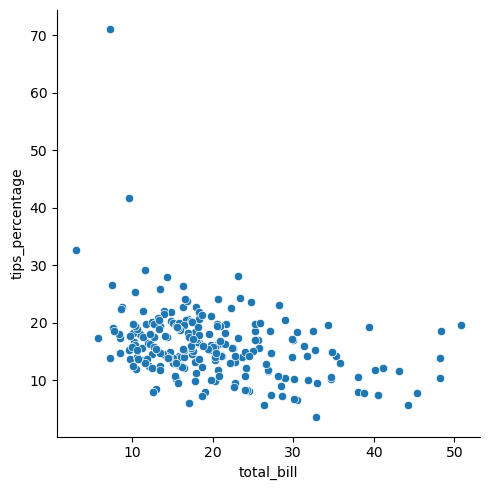

In [11]:
seaborn.relplot(data=tips,x='total_bill',y='tips_percentage')

In [1]:
import pandas as pd
tips= pd.read_csv("../Datasets/tips.csv")
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size
36,16.31,2.0,Male,No,Sat,Dinner,3
214,28.17,6.5,Female,Yes,Sat,Dinner,3
207,38.73,3.0,Male,Yes,Sat,Dinner,4
98,21.01,3.0,Male,Yes,Fri,Dinner,2


In [2]:
tips['tips_percentage']= tips['tip']/tips['total_bill'] * 100

In [3]:
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size,tips_percentage
120,11.69,2.31,Male,No,Thur,Lunch,2,19.760479
68,20.23,2.01,Male,No,Sat,Dinner,2,9.935739
36,16.31,2.00,Male,No,Sat,Dinner,3,12.262416
45,18.29,3.00,Male,No,Sun,Dinner,2,16.402406


In [5]:
tips_smoker= tips[tips['smoker']=='Yes']
tips_smoker
    
    

,total_bill,tip,sex,smoker,day,time,size,tips_percentage
56,38.01,3.00,Male,Yes,Sat,Dinner,4,7.892660
58,11.24,1.76,Male,Yes,Sat,Dinner,2,15.658363
60,20.29,3.21,Male,Yes,Sat,Dinner,2,15.820601
61,13.81,2.00,Male,Yes,Sat,Dinner,2,14.482259
62,11.02,1.98,Male,Yes,Sat,Dinner,2,17.967332
...,...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2,19.317450
236,12.60,1.00,Male,Yes,Sat,Dinner,2,7.936508
237,32.83,1.17,Male,Yes,Sat,Dinner,2,3.563814
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352


In [8]:
def tips_good(tips_percent):
    if tips_percent>18:
        label="yes"
    else:
        label="No"
    
    return label



tips['tips_more']= tips['tips_percentage'].apply(tips_good)

tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,tips_percentage,tips_more
21,20.29,2.75,Female,No,Sat,Dinner,2,13.553475,No
103,22.42,3.48,Female,Yes,Sat,Dinner,2,15.521855,No
202,13.00,2.00,Female,Yes,Thur,Lunch,2,15.384615,No
184,40.55,3.00,Male,Yes,Sun,Dinner,2,7.398274,No
24,19.82,3.18,Male,No,Sat,Dinner,2,16.044400,No


In [9]:
more_smoker_tips= tips[tips['tips_more']=='yes']

more_smoker_tips

,total_bill,tip,sex,smoker,day,time,size,tips_percentage,tips_more
5,25.29,4.71,Male,No,Sun,Dinner,4,18.623962,yes
6,8.77,2.00,Male,No,Sun,Dinner,2,22.805017,yes
9,14.78,3.23,Male,No,Sun,Dinner,2,21.853857,yes
14,14.83,3.02,Female,No,Sun,Dinner,2,20.364127,yes
15,21.58,3.92,Male,No,Sun,Dinner,2,18.164968,yes
...,...,...,...,...,...,...,...,...,...
228,13.28,2.72,Male,No,Sat,Dinner,2,20.481928,yes
231,15.69,3.00,Male,Yes,Sat,Dinner,3,19.120459,yes
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966,yes
234,15.53,3.00,Male,Yes,Sat,Dinner,2,19.317450,yes
